In [129]:
import pprint
import requests

In [130]:
secret = 'b3efa778726644459e391e4fdb18f142'

In [131]:
# Define the endpoint
url = 'https://newsapi.org/v2/everything?'

In [132]:
topic = 'deforestation'

In [133]:
# Specify the query and number of returns
parameters = {
    'q': topic, # query phrase
    'pageSize': 100,  # maximum is 100
    'apiKey': secret # your own API key
}

In [134]:
# Make the request
response = requests.get(url, params=parameters)

# Convert the response to JSON format and pretty print it
response_json = response.json()
pprint.pprint(response_json)

{'articles': [{'author': None,
               'content': "URUARA, Brazil, Feb 2 (Reuters) - Brazil's "
                          'environmental enforcement agents set out in January '
                          'on their first mission this year to combat illegal '
                          'deforestation, with renewed energy after the '
                          'election… [+7550 chars]',
               'description': "Brazil's environmental enforcement agents set "
                              'out in January on their first mission this year '
                              'to combat illegal deforestation, with renewed '
                              'energy after the election of a president who '
                              'has promised to stop surging Amazon rainforest '
                              'destruction.',
               'publishedAt': '2023-02-02T10:06:00Z',
               'source': {'id': 'reuters', 'name': 'Reuters'},
               'title': "Lula's Amazon pledge loo

In [135]:
combine_dict = []

for i in response_json['articles']:
    # print(i['title'])
    API_news_list = {"Description": i['description'], "Label": topic}
    combine_dict.append(API_news_list)


In [136]:
# creating a csv
import pandas as pd
my_df = pd.DataFrame(combine_dict)
my_df.to_csv("News_on_" + topic + ".csv", index = False)


In [137]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [138]:
# Create an empty string
text_combined = ''
# Loop through all the headlines and add them to 'text_combined' 
for i in response_json['articles']:
    text_combined += i['description'] + ' ' # add a space after every headline, so the first and last words are not glued together
# Print the first 300 characters to screen for inspection
print(text_combined[0:300])

Brazil's environmental enforcement agents set out in January on their first mission this year to combat illegal deforestation, with renewed energy after the election of a president who has promised to stop surging Amazon rainforest destruction. With just 3,000 of the pig-like animals still roaming t


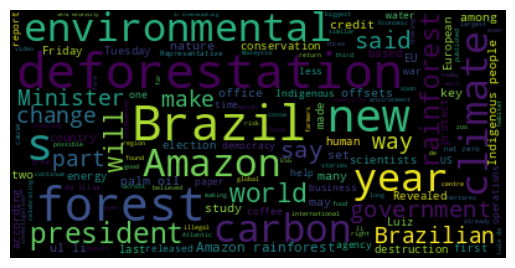

In [139]:
wordcloud = WordCloud(max_font_size=40).generate(text_combined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()